In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [3]:
data = pd.read_excel("Copy of loan.xlsx")

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

With a few missing values in some columns, we'd fill them up rather than dropping the rows so we don't loose data.

We'd use an efficient way called K-nearest neighbours to determine the best values to fill up an empty value based on its nearest neighbours.

In [6]:
# Drop loan ID
data.drop(columns=["Loan_ID"], inplace=True)


In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
columns_to_mode_fill = ["Gender","Married","Dependents","Self_Employed","Self_Employed","Loan_Amount_Term","Credit_History"]
columns_to_mean_fill = ["LoanAmount"]

def fill_na_mode_mean(df, columns_to_mode_fill, columns_to_mean_fill):
    for column in columns_to_mode_fill:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

    for column in columns_to_mean_fill:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    return df

data = fill_na_mode_mean(data.copy(), columns_to_mode_fill, columns_to_mean_fill)

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

/var/folders/1y/tjpkyylj5rn_6r17jrmpj5k00000gn/T/ipykernel_89835/409422585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


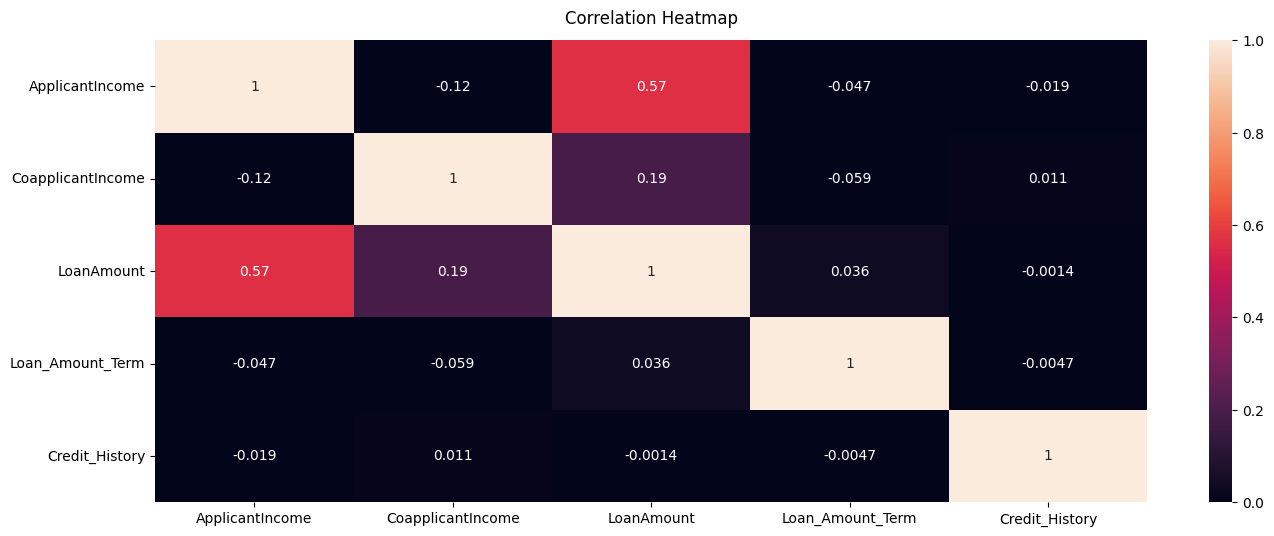

In [10]:
# Correlation
corr = data.corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=0, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Data Split

In [11]:
# Label encode our categorical columns

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
label_mappings = {}

# Label encode the categorical columns and store the mappings
for column in categorical_columns:
    data[column].fillna(-1, inplace=True)
    data[column], label_mapping = pd.factorize(data[column])
    label_mappings[column] = label_mapping

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,0
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,1
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,0
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,0
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,2900,0.0,71.000000,360.0,1.0,1,0
610,0,1,3,0,0,4106,0.0,40.000000,180.0,1.0,1,0
611,0,1,1,0,0,8072,240.0,253.000000,360.0,1.0,0,0
612,0,1,2,0,0,7583,0.0,187.000000,360.0,1.0,0,0


In [12]:
label_mappings

{'Gender': Index(['Male', 'Female'], dtype='object'),
 'Married': Index(['No', 'Yes'], dtype='object'),
 'Dependents': Index([0, 1, 2, '3+'], dtype='object'),
 'Education': Index(['Graduate', 'Not Graduate'], dtype='object'),
 'Self_Employed': Index(['No', 'Yes'], dtype='object'),
 'Property_Area': Index(['Urban', 'Rural', 'Semiurban'], dtype='object'),
 'Loan_Status': Index(['Y', 'N'], dtype='object')}

In [13]:
y = data['Loan_Status']
X = data.drop(['Loan_Status'],axis='columns')

In [14]:
# Diving the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [15]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,0,0,0,0,0,8750,4167.0,308.0,360.0,1.0,1
593,0,1,0,0,0,3859,3300.0,142.0,180.0,1.0,1
320,0,1,0,0,0,2400,2167.0,115.0,360.0,1.0,2
186,0,1,1,0,1,2178,0.0,66.0,300.0,0.0,1
557,0,1,3,0,1,10139,0.0,260.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
277,0,1,0,0,0,3103,1300.0,80.0,360.0,1.0,0
9,0,1,1,0,0,12841,10968.0,349.0,360.0,1.0,2
359,0,1,3,0,0,5167,3167.0,200.0,360.0,1.0,2
192,0,1,0,1,0,6033,0.0,160.0,360.0,1.0,0


### Random Forest Classifier

In [16]:
# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
print(accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

0.7891891891891892
[[125   9]
 [ 30  21]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       134
           1       0.70      0.41      0.52        51

    accuracy                           0.79       185
   macro avg       0.75      0.67      0.69       185
weighted avg       0.78      0.79      0.77       185



The RandomForestClassifier performs relatively well with an accuracy score of 79.4%! Let's try the XGBoostClassifier and see if it can outperform the RandomForest.

### XGBoost Classifier

In [17]:
# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
print(accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, rf_preds))

0.7945945945945946
[[118  16]
 [ 22  29]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       134
           1       0.70      0.41      0.52        51

    accuracy                           0.79       185
   macro avg       0.75      0.67      0.69       185
weighted avg       0.78      0.79      0.77       185



### Handle Class Imbalance

In [73]:
#%pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
print("Before Oversampling - ")
print("0: ", len(y[y==0]))
print("1: ", len(y[y==1]))

Before Oversampling - 
0:  422
1:  192


In [20]:
smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [21]:
print("After Oversampling - ")
print("0: ", len(y[y==0]))
print("1: ", len(y[y==1]))

After Oversampling - 
0:  422
1:  422


In [22]:
# Diving the dataset into train and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

### Random Forest Classifier Balanced

In [23]:
# Fitting Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
rf_preds = rf.predict(X_test)

# Performance
print(accuracy_score(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

0.8031496062992126
[[104  14]
 [ 36 100]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       118
           1       0.88      0.74      0.80       136

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.80       254
weighted avg       0.81      0.80      0.80       254



### XGBoost Classifier Balanced

In [24]:
# Fitting Model
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

# Predictions
xgb_preds = xgbc.predict(X_test)

# Test set performance
print(accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print(classification_report(y_test, rf_preds))

0.7952755905511811
[[102  16]
 [ 36 100]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       118
           1       0.88      0.74      0.80       136

    accuracy                           0.80       254
   macro avg       0.81      0.81      0.80       254
weighted avg       0.81      0.80      0.80       254



In [25]:
# Save and export model
xgbc.save_model("model.json")

In [8]:
new_xgbc = XGBClassifier()

# Load model
new_xgbc.load_model("model.json")
# Prediction

column = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]
values = [[1, 0, 1, 1, 1, 17263, 0.0, 22.5, 360.0, 1.0, 2]]
df = pd.DataFrame(data=values, columns=column)

df

xgb_preds = new_xgbc.predict(df)
xgb_preds

array([0])

In [47]:
xgb_preds[0]

0

In [49]:
dict1 = {"Gender": "Male", "Married": "Yes", "Dependents": "3+", "LoanAmount": 536, "Education": "Not Graduate", "ApplicantIncome":53982}
dict2 = {'Gender': ['Male', 'Female'], 'Married': ['No', 'Yes'], 'Dependents': ['0', '1', '2', '3+'], 'Education': ['Graduate', 'Not Graduate']}

# Create a list based on positional values in dict2
result_list = [dict2[key].index(dict1[key]) if key in dict2 else dict1[key] for key in dict1]

print(result_list)


[0, 1, 3, 536, 1, 53982]


In [9]:
import pandas as pd
from xgboost import XGBClassifier

label_mappings = {'Gender': ['Male', 'Female'],
                'Married': ['No', 'Yes'],
                'Dependents': ['0', '1', '2', '3+'],
                'Education': ['Graduate', 'Not Graduate'],
                'Self_Employed': ['No', 'Yes'],
                'Property_Area': ['Urban', 'Rural', 'Semiurban'],
                'Loan_Status': ['Y', 'N']
                }

data = {'Name': 'Agabi Paul', 'Email': 'davidodenikpi@gmail.com', 'Gender': 'Male', 'Married': 'No', 'Dependents': '1', 'Education': 'Graduate', 'Self_Employed': 'No', 'ApplicantIncome': '5500.0', 'CoapplicantIncome': '1500.0', 'LoanAmount': '10000.0', 'Loan_Amount_Term': '360.0', 'Credit_History': '1', 'Property_Area': 'Rural'}

# Pop name and email fields from the dictionary 
name = data['Name']
email = data['Email']
data.pop('Name', None)
data.pop("Email", None)

# Convert related fields from strings to floats
data.update(
    {'ApplicantIncome': float(data['ApplicantIncome']),
    'CoapplicantIncome': float(data['CoapplicantIncome']),
    'LoanAmount': float(data['LoanAmount']),
    'Loan_Amount_Term': float(data['Loan_Amount_Term']),
    'Credit_History': float(data['Credit_History'])
    }
)

print(data)

# Create a list based on positional values in dict2
values = [label_mappings[key].index(data[key]) if key in label_mappings else data[key] for key in data]
column = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]

new_xgbc = XGBClassifier()
new_xgbc.load_model("model.json")

df = pd.DataFrame([values], columns=data)
xgb_preds = new_xgbc.predict(df)

print(xgb_preds[0])

{'Gender': 'Male', 'Married': 'No', 'Dependents': '1', 'Education': 'Graduate', 'Self_Employed': 'No', 'ApplicantIncome': 5500.0, 'CoapplicantIncome': 1500.0, 'LoanAmount': 10000.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 'Rural'}
1
